<a href="https://colab.research.google.com/github/Chediak/common-master-ai/blob/main/neogrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install ace_tools

RMSE (Root Mean Square Error): 1.9780672612164173e-13


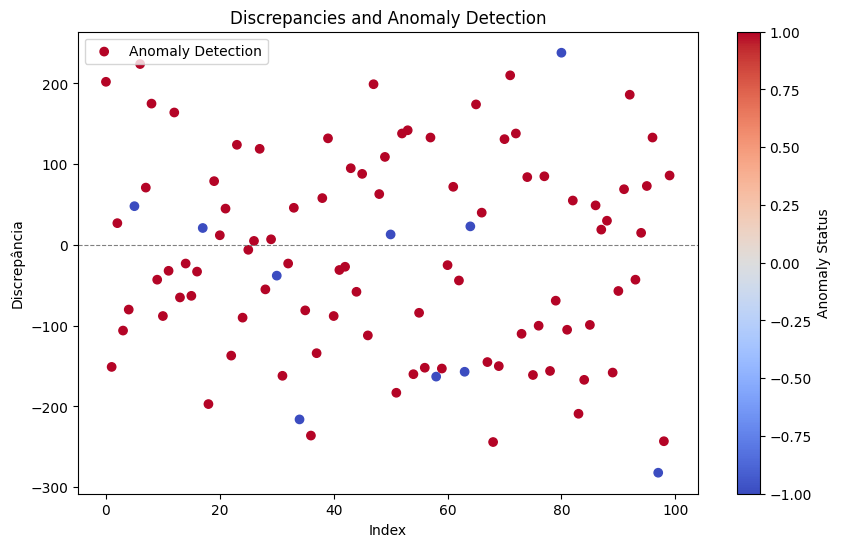

    Canal Holding Investigação  Inventário Inicial  Sell In  Sell Out  \
0  DIS VI          DISTRIB RIO                 253      283       485   
1  DIS VI          DISTRIB RIO                 447      487       336   
2  DIS VI          DISTRIB RIO                 331      220       247   
3  DIS VI          DISTRIB RIO                 289      312       206   
4  DIS VI          DISTRIB RIO                 440      326       246   
5  DIS VI          DISTRIB RIO                 210      202       250   
6  DIS VI          DISTRIB RIO                 493      262       486   
7  DIS VI          DISTRIB RIO                 476      277       348   
8  DIS VI          DISTRIB RIO                 256      228       403   
9  DIS VI          DISTRIB RIO                 317      388       345   

   Discrepância  Anomaly  
0           202        1  
1          -151        1  
2            27        1  
3          -106        1  
4           -80        1  
5            48       -1  
6      

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Simulating the dataset based on the provided structure
data = {
    "Canal": ["DIS VI"] * 100,
    "Holding Investigação": ["DISTRIB RIO"] * 100,
    "Inventário Inicial": np.random.randint(200, 500, 100),
    "Sell In": np.random.randint(200, 500, 100),
    "Sell Out": np.random.randint(200, 500, 100),
    "Inventário Rolado": np.random.randint(200, 500, 100),
    "Inventário Inf. Rolado": np.random.randint(200, 500, 100),
}

df = pd.DataFrame(data)

# Creating a discrepancy feature
df["Discrepância"] = df["Sell Out"] - df["Sell In"]

# Splitting the dataset into features and target
X = df[["Inventário Inicial", "Sell In", "Sell Out", "Inventário Rolado", "Inventário Inf. Rolado"]]
y = df["Discrepância"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model performance
errors = y_test - y_pred
rmse = np.sqrt(np.mean(errors**2))

# Printing RMSE
print(f"RMSE (Root Mean Square Error): {rmse}")

# Anomaly detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(X)

# Visualizing the discrepancies and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Discrepância"], c=df["Anomaly"], cmap='coolwarm', label='Anomaly Detection')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Discrepancies and Anomaly Detection")
plt.xlabel("Index")
plt.ylabel("Discrepância")
plt.colorbar(label="Anomaly Status")
plt.legend()
plt.show()

# Displaying a sample of the data
df_sample = df[["Canal", "Holding Investigação", "Inventário Inicial", "Sell In", "Sell Out", "Discrepância", "Anomaly"]]
print(df_sample.head(10))

RMSE do modelo de previsão de Crescimento: 1.31


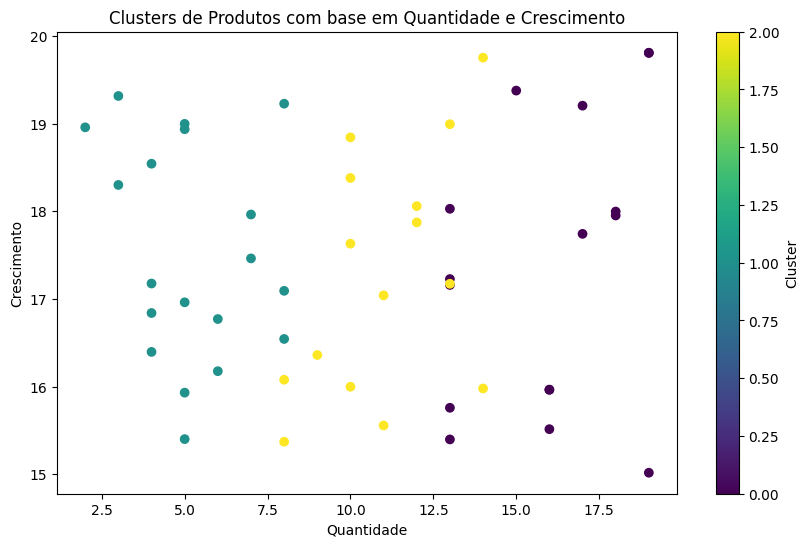

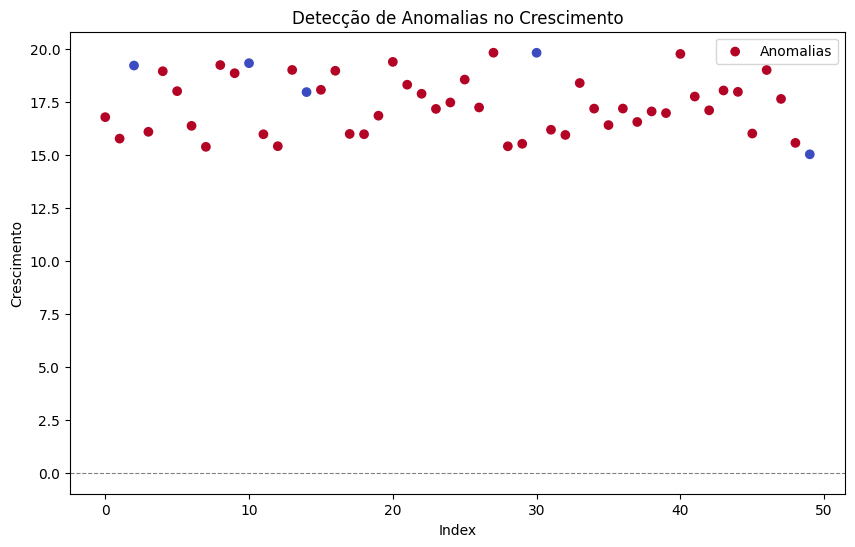

   Codigo_Barras  Quantidade  Preco_Unitario  Preco_Medio  Crescimento  \
0  7622210571805           6       14.224708     0.840954    16.771759   
1  7622210571805          13       10.885024     0.928955    15.759198   
2  7622210571805          17       11.340142     0.969745    19.206045   
3  7622210571805           8       19.318847     0.963561    16.079651   
4  7622210571805           5       17.006998     0.903820    18.937568   
5  7622210571805          18       13.967860     0.837113    17.997936   
6  7622210571805           9       17.230621     0.883485    16.361418   
7  7622210571805           8       19.868312     0.863295    15.372076   
8  7622210571805           8       14.607782     0.810719    19.228445   
9  7622210571805          10       18.278363     0.816410    18.844303   

   Proporcao_Preco_Quantidade  Diferenca_Preco  Anomalia  Cluster  
0                    2.370785       -13.383754         1        1  
1                    0.837310        -9.956068   

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Simulando dados com base na tabela da imagem
data = {
    "Codigo_Barras": [7622210571805] * 50,
    "Quantidade": np.random.randint(1, 20, 50),
    "Preco_Unitario": np.random.uniform(10, 20, 50),
    "Preco_Medio": np.random.uniform(0.8, 1.0, 50),
    "Crescimento": np.random.uniform(15, 20, 50)
}

df = pd.DataFrame(data)

# Criando novas métricas
df["Proporcao_Preco_Quantidade"] = df["Preco_Unitario"] / df["Quantidade"]
df["Diferenca_Preco"] = df["Preco_Medio"] - df["Preco_Unitario"]

# Detecção de Anomalias com Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomalia"] = iso_forest.fit_predict(df[["Quantidade", "Preco_Unitario", "Preco_Medio", "Crescimento"]])

# Previsão de Crescimento com Regressão Linear
X = df[["Quantidade", "Preco_Unitario", "Preco_Medio", "Proporcao_Preco_Quantidade", "Diferenca_Preco"]]
y = df["Crescimento"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação do modelo
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"RMSE do modelo de previsão de Crescimento: {rmse:.2f}")

# Clustering com K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Quantidade", "Preco_Unitario", "Crescimento"]])

# Visualizando clusters
plt.figure(figsize=(10, 6))
plt.scatter(df["Quantidade"], df["Crescimento"], c=df["Cluster"], cmap='viridis')
plt.title("Clusters de Produtos com base em Quantidade e Crescimento")
plt.xlabel("Quantidade")
plt.ylabel("Crescimento")
plt.colorbar(label="Cluster")
plt.show()

# Visualizando as anomalias
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Crescimento"], c=df["Anomalia"], cmap='coolwarm', label="Anomalias")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Detecção de Anomalias no Crescimento")
plt.xlabel("Index")
plt.ylabel("Crescimento")
plt.legend()
plt.show()

# Exibindo a tabela com anomalias e clusters
print(df.head(10))


RMSE do modelo de previsão de Quantidade: 6.27


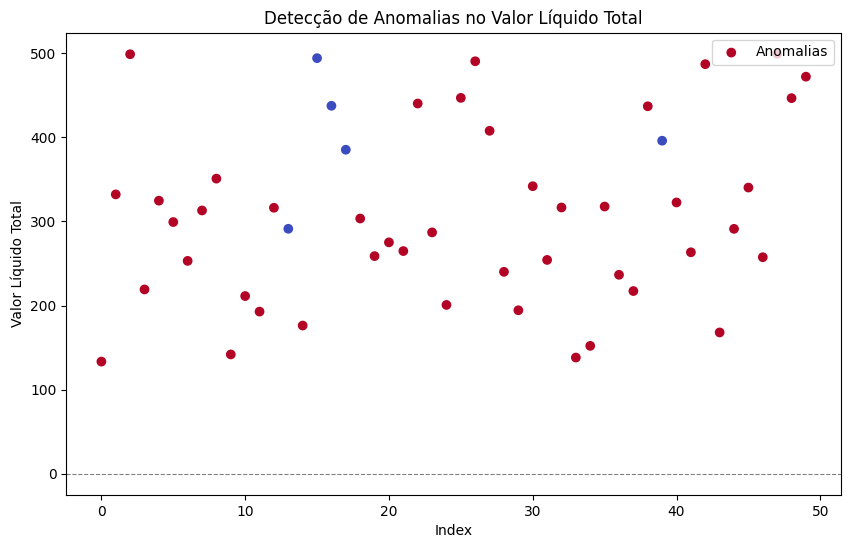

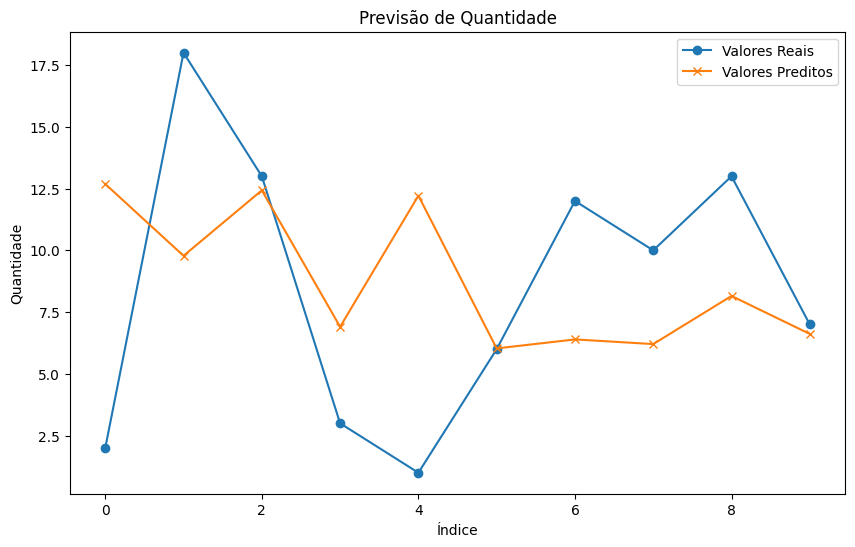

  Data_Transacao  Codigo_Barras  Quantidade  Preco_Unitario  \
0     2024-11-01  7622210571805           9       15.007568   
1     2024-11-02  7622210571805           7       13.897032   
2     2024-11-03  7622210571805          10       13.679187   
3     2024-11-04  7622210571805          10       17.811482   
4     2024-11-05  7622210571805          13       14.969321   
5     2024-11-06  7622210571805          11       13.961715   
6     2024-11-07  7622210571805           9       17.555065   
7     2024-11-08  7622210571805          11       18.515148   
8     2024-11-09  7622210571805           6       14.193608   
9     2024-11-10  7622210571805          11       13.069572   

   Valor_Liquido_Total  Fator_Conversao  Preco_Unitario_Calculado  Anomalia  
0           133.368820         1.031536                 14.818758         1  
1           332.233038         0.857045                 47.461863         1  
2           498.950001         1.164674                 49.895000       

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Simulando os dados extraídos do SQL
data = {
    "Data_Transacao": pd.date_range(start="2024-11-01", periods=50, freq="D"),
    "Codigo_Barras": [7622210571805] * 50,
    "Quantidade": np.random.randint(1, 20, 50),
    "Preco_Unitario": np.random.uniform(10, 20, 50),
    "Valor_Liquido_Total": np.random.uniform(100, 500, 50),
    "Fator_Conversao": np.random.uniform(0.8, 1.2, 50)
}

df = pd.DataFrame(data)

# Calculando métricas derivadas
df["Preco_Unitario_Calculado"] = df["Valor_Liquido_Total"] / df["Quantidade"]

# Detecção de Anomalias
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomalia"] = iso_forest.fit_predict(df[["Quantidade", "Preco_Unitario", "Valor_Liquido_Total"]])

# Análise Preditiva (Regressão Linear para prever `Quantidade`)
X = df[["Preco_Unitario", "Fator_Conversao", "Valor_Liquido_Total"]]
y = df["Quantidade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação do modelo
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"RMSE do modelo de previsão de Quantidade: {rmse:.2f}")

# Visualizando as anomalias
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Valor_Liquido_Total"], c=df["Anomalia"], cmap='coolwarm', label="Anomalias")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Detecção de Anomalias no Valor Líquido Total")
plt.xlabel("Index")
plt.ylabel("Valor Líquido Total")
plt.legend()
plt.show()

# Visualizando os dados previstos vs reais
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Valores Reais", marker='o')
plt.plot(y_pred, label="Valores Preditos", marker='x')
plt.title("Previsão de Quantidade")
plt.xlabel("Índice")
plt.ylabel("Quantidade")
plt.legend()
plt.show()

# Exibindo a tabela com anomalias
print(df.head(10))

RMSE para prever Valor Líquido Total: 130.10


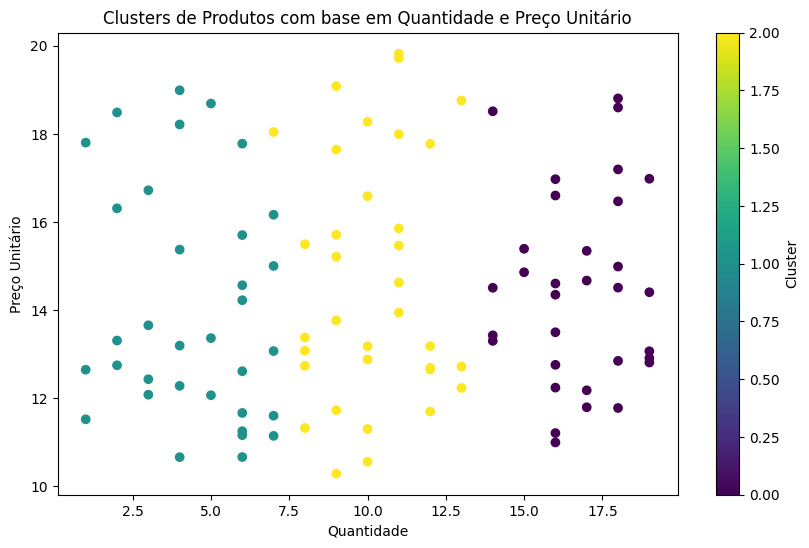

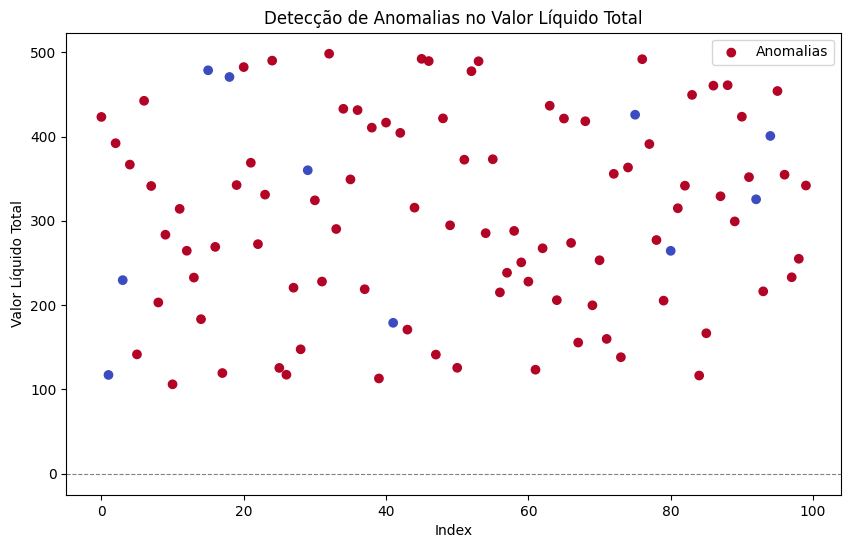

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Simulando dados do SQL
data = {
    "Codigo_Barras": [7622210571805] * 100,
    "Quantidade": np.random.randint(1, 20, 100),
    "Preco_Unitario": np.random.uniform(10, 20, 100),
    "Valor_Liquido_Total": np.random.uniform(100, 500, 100),
    "Fator_Conversao": np.random.uniform(0.8, 1.2, 100)
}
df = pd.DataFrame(data)

# Criando métricas adicionais
df["Preco_Unitario_Calculado"] = df["Valor_Liquido_Total"] / df["Quantidade"]

# Divisão de dados para treinamento e teste
X = df[["Quantidade", "Preco_Unitario", "Fator_Conversao"]]
y = df["Valor_Liquido_Total"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Preditivo - Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliando o modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE para prever Valor Líquido Total: {rmse:.2f}")

# Detecção de Anomalias com Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomalia"] = iso_forest.fit_predict(df[["Quantidade", "Preco_Unitario", "Fator_Conversao"]])

# Clustering para Segmentação
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Quantidade", "Preco_Unitario", "Fator_Conversao"]])

# Visualizando os clusters
plt.figure(figsize=(10, 6))
plt.scatter(df["Quantidade"], df["Preco_Unitario"], c=df["Cluster"], cmap='viridis')
plt.title("Clusters de Produtos com base em Quantidade e Preço Unitário")
plt.xlabel("Quantidade")
plt.ylabel("Preço Unitário")
plt.colorbar(label="Cluster")
plt.show()

# Visualizando as anomalias
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Valor_Liquido_Total"], c=df["Anomalia"], cmap='coolwarm', label="Anomalias")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Detecção de Anomalias no Valor Líquido Total")
plt.xlabel("Index")
plt.ylabel("Valor Líquido Total")
plt.legend()
plt.show()